Loaded: C:\Users\abhin\Downloads\Multiple Linear Regression (1)\ToyotaCorolla - MLR.csv
Shape: (1436, 11)


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


Columns: ['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc', 'Doors', 'Cylinders', 'Gears', 'Weight']

Feature columns used:
['Age_08_04', 'KM', 'HP', 'cc', 'Weight', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Automatic_1']

=== MODEL METRICS ===
R² (test): 0.8348
RMSE (test): 1484.45

=== Model Coefficients ===


,feature,coefficient
0,Fuel_Type_Petrol,1417.076108
1,Automatic_1,127.957087
2,Age_08_04,-120.974609
3,Fuel_Type_Diesel,108.846049
4,Weight,25.046336
5,HP,16.967539
6,cc,-0.035527
7,KM,-0.016164



Intercept: -11169.89998315274

Example input (first test row):


,Age_08_04,KM,HP,cc,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol,Automatic_1
594,50,22500,97,1400,1025,False,True,False


Predicted Price: 11103.355572527209
Actual Price: 10800


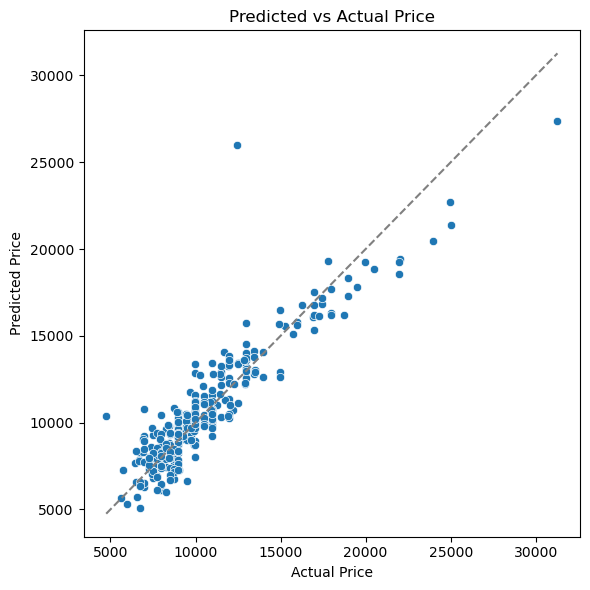

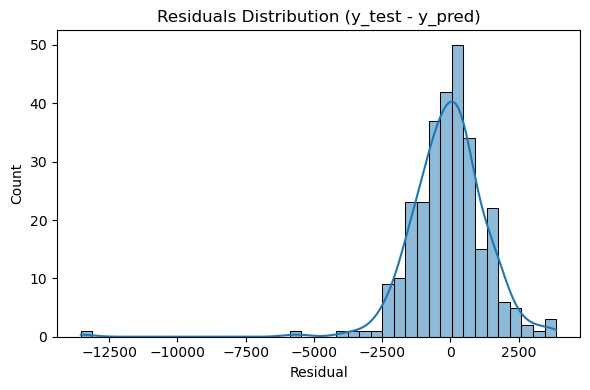

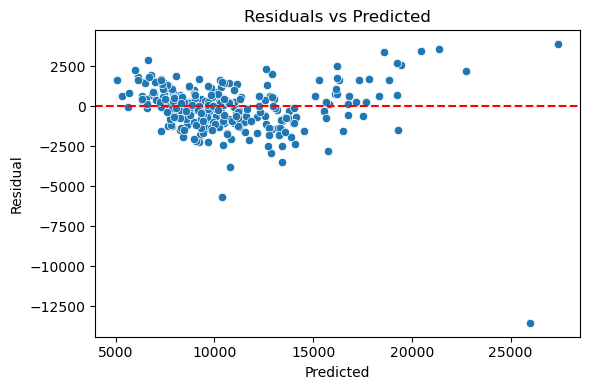


Saved: Toyota_MLR_coefficients.csv and Toyota_MLR_predictions.csv in current working folder.


In [1]:
# ==========================================
# PROGRAM: MULTIPLE LINEAR REGRESSION (MLR)
# DATA: ToyotaCorolla - Car Price Prediction
# FILE: C:\Users\abhin\Downloads\Multiple Linear Regression (1)\ToyotaCorolla - MLR.csv
#
# FEATURES USED:
#   Numeric: Age_08_04, KM, HP, cc, Weight
#   Categorical: Fuel_Type, Automatic  (one-hot encoded)
# TARGET:
#   Price
# ==========================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# ---------- LOAD DATA ----------
path = r"C:\Users\abhin\Downloads\Multiple Linear Regression (1)\ToyotaCorolla - MLR.csv"
df = pd.read_csv(path)
print("Loaded:", path)
print("Shape:", df.shape)
display(df.head())

# ---------- SHOW COLUMNS (sanity) ----------
print("Columns:", list(df.columns))

# ---------- PREPARE FEATURES ----------
# choose numeric columns present in your file
numeric_features = ['Age_08_04', 'KM', 'HP', 'cc', 'Weight']

# categorical features to encode (if present)
cat_features = [c for c in ['Fuel_Type', 'Automatic'] if c in df.columns]

# build X and y
X_num = df[numeric_features].copy()
X_cat = pd.get_dummies(df[cat_features].astype(str), drop_first=True) if cat_features else pd.DataFrame(index=df.index)
X = pd.concat([X_num, X_cat], axis=1)
y = df['Price']

print("\nFeature columns used:")
print(list(X.columns))

# ---------- TRAIN / TEST SPLIT ----------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------- FIT MODEL ----------
model = LinearRegression()
model.fit(X_train, y_train)

# ---------- PREDICTIONS ----------
y_pred = model.predict(X_test)

# ---------- METRICS ----------
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\n=== MODEL METRICS ===")
print(f"R² (test): {r2:.4f}")
print(f"RMSE (test): {rmse:.2f}")

# ---------- COEFFICIENTS (show with feature names) ----------
coef_df = pd.DataFrame({
    'feature': X.columns,
    'coefficient': model.coef_
}).sort_values(by='coefficient', key=abs, ascending=False).reset_index(drop=True)
print("\n=== Model Coefficients ===")
display(coef_df)

print("\nIntercept:", model.intercept_)

# ---------- EXAMPLE PREDICTION (first test row) ----------
if X_test.shape[0] > 0:
    ex = X_test.iloc[0:1]
    print("\nExample input (first test row):")
    display(ex)
    print("Predicted Price:", model.predict(ex)[0])
    print("Actual Price:", y_test.iloc[0])

# ---------- PLOTS ----------
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual Price")
lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, '--', color='gray')  # 45-degree line
plt.tight_layout()
plt.show()

# Residuals plot
residuals = y_test - y_pred
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution (y_test - y_pred)")
plt.xlabel("Residual")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.title("Residuals vs Predicted")
plt.tight_layout()
plt.show()

# ---------- OPTIONAL: Save model coefficients and predictions ----------
coef_df.to_csv("Toyota_MLR_coefficients.csv", index=False)
preds = X_test.copy()
preds['ActualPrice'] = y_test.values
preds['PredictedPrice'] = y_pred
preds.to_csv("Toyota_MLR_predictions.csv", index=False)

print("\nSaved: Toyota_MLR_coefficients.csv and Toyota_MLR_predictions.csv in current working folder.")


In [ ]:
# Interview Questions:
# 1.What is Normalization & Standardization and how is it helpful?
# 2.What techniques can be used to address multicollinearity in multiple linear regression?

# 1. What is Normalization & Standardization, and how is it helpful?
# ->Normalization
#    ->Normalization means scaling values between 0 and 1.
#    ->Example: using Min-Max scaling.
# ->It is helpful when features have different ranges and we want all features to be on the same scale.
# ->Standardization
#    ->Standardization means converting data to mean = 0 and standard deviation = 1
#     ->Data becomes like a normal distribution.
#     ->It is helpful for algorithms that depend on distance or gradient (ex: Logistic Regression, SVM, KNN).

# 2.What techniques can be used to address multicollinearity in multiple linear regression?
# 1. Remove one of the highly correlated variables
#  ->If two features are giving same information, remove one.
# 2. Use PCA (Principal Component Analysis)
#  ->Converts correlated features into new uncorrelated components.
# 3. Use Regularization (Ridge or Lasso)
#  ->Ridge helps reduce the effect of correlated features.
# Lasso can even remove some features (makes their coefficient zero).
# 4. Check VIF (Variance Inflation Factor) and drop high-VIF variables
#  High VIF means too much multicollinearity.